In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers, utils, layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, BatchNormalization, ReLU
from keras.preprocessing import image

import glob
from tqdm import tqdm
import os
import random
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
from torch.nn import functional as F
import torch 

In [2]:
root = "E:/Dataset/UsedSet/"
face_images = glob.glob(root + "*.*")

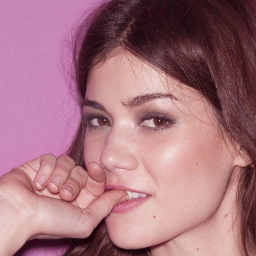

In [21]:
img = utils.load_img(face_images[0])
img

In [4]:
all_images = []



for i in tqdm(face_images):
    img = utils.load_img(i)
    img = utils.img_to_array(img)
    img = img/255.0
    all_images.append(img)

100%|██████████| 105/105 [00:00<00:00, 388.51it/s]


In [5]:
all_images = np.array(all_images)

# split data into train and validation data
train_x, test_x = train_test_split(all_images, random_state=32, test_size=0.1)

In [6]:
Input_img = Input(shape=(256,256,3))

#encoder

x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)

x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)

x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

In [9]:
def resblock(x, kernelsize, filters):
    fx = Conv2D(filters, kernelsize, activation='relu', padding='same')(x)
    fx = BatchNormalization()(fx)
    fx = Conv2D(filters, kernelsize, padding='same')(fx)
    out = layers.Add()([x,fx])
    out = ReLU()(fx)
    out = BatchNormalization()(out)
    return out

In [10]:
x4 = resblock(x3,(3,3),64)
x5 = resblock(x4,(3,3),64)
x6 = resblock(x5,(3,3),64)
encoded = resblock(x6,(3,3),64)

In [11]:
#decoder

x7 = resblock(encoded,(3,3),64)
x8 = resblock(x7,(3,3),64)
x9 = resblock(x8,(3,3),64)
x10 = resblock(x9,(3,3),64)

x11 = Conv2D(64, (3, 3), activation='relu', padding='same')(x10)

#x11 = UpSampling2D((2, 2))(x11)

x12 = Conv2D(128, (3, 3), activation='relu', padding='same')(x11)

#x12 = UpSampling2D((2, 2))(x12)

x13 = Conv2D(256, (3, 3), activation='relu', padding='same')(x12)

decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x13)

In [12]:
Aman = Model(Input_img,decoded)
Aman.compile(optimizer='adam',loss='mse')

In [13]:
Aman

In [14]:
print(Aman.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     295040    
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      73792     
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 64)     256       
 hNormalization)                                                 
                                                             

In [15]:
a_e = Aman.fit(train_x, train_x,
            epochs=10,
            batch_size=5,
            shuffle=True)

Epoch 1/10
19/19 [==============================] - 230s 12s/step - loss: 0.2496
Epoch 2/10
19/19 [==============================] - 230s 12s/step - loss: 0.0788
Epoch 3/10
19/19 [==============================] - 224s 12s/step - loss: 0.0814
Epoch 4/10
19/19 [==============================] - 223s 12s/step - loss: 0.0794
Epoch 5/10
19/19 [==============================] - 227s 12s/step - loss: 0.0730
Epoch 6/10
19/19 [==============================] - 223s 12s/step - loss: 0.0722
Epoch 7/10
19/19 [==============================] - 224s 12s/step - loss: 0.0746
Epoch 8/10
19/19 [==============================] - 221s 12s/step - loss: 0.0762
Epoch 9/10
19/19 [==============================] - 221s 12s/step - loss: 0.0722
Epoch 10/10
19/19 [==============================] - 221s 12s/step - loss: 0.0733


In [16]:
predictions = Aman.predict(test_x)

1/1 [==============================] - 7s 7s/step


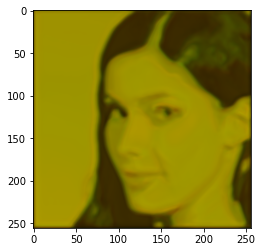

In [18]:
plt.imshow(predictions[3])

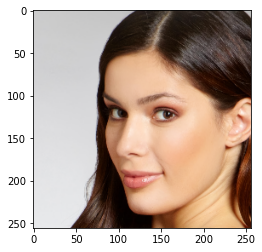

In [20]:
plt.imshow(test_x[3])